In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from scipy.interpolate import griddata
BCIsensor_xy = np.genfromtxt('BCIsensor_xy.csv',delimiter=',')
feaSubEImg_1 = np.genfromtxt('feaSubEImg_1.csv',delimiter=',')
feaSubEImg_2 = np.genfromtxt('feaSubEImg_2.csv',delimiter=',')
feaSubEOvert_1 = np.genfromtxt('feaSubEOvert_1.csv',delimiter=',')
feaSubEOvert_2 = np.genfromtxt('feaSubEOvert_2.csv',delimiter=',')

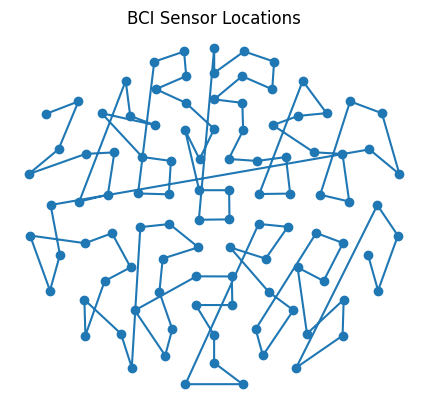

In [115]:
plt.plot(BCIsensor_xy[:,0],BCIsensor_xy[:,1])
plt.scatter(BCIsensor_xy[:,0],BCIsensor_xy[:,1])
plt.title("BCI Sensor Locations")
ax = plt.gca()
ax.set_aspect('equal')
plt.axis('off')
plt.show()

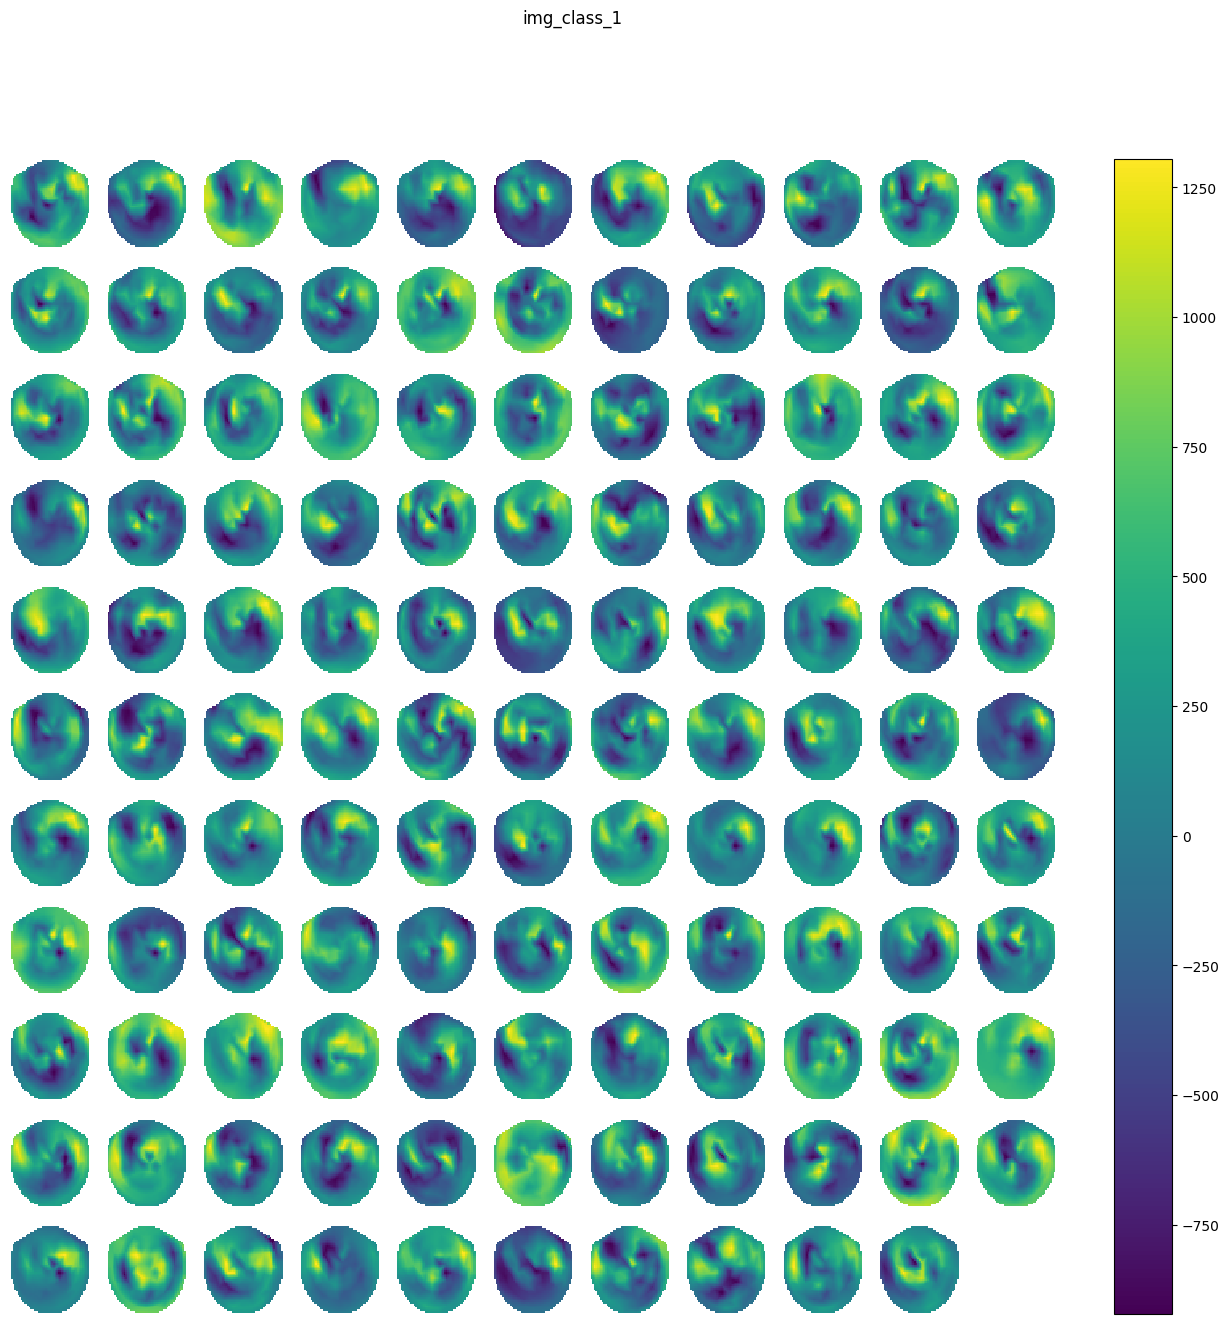

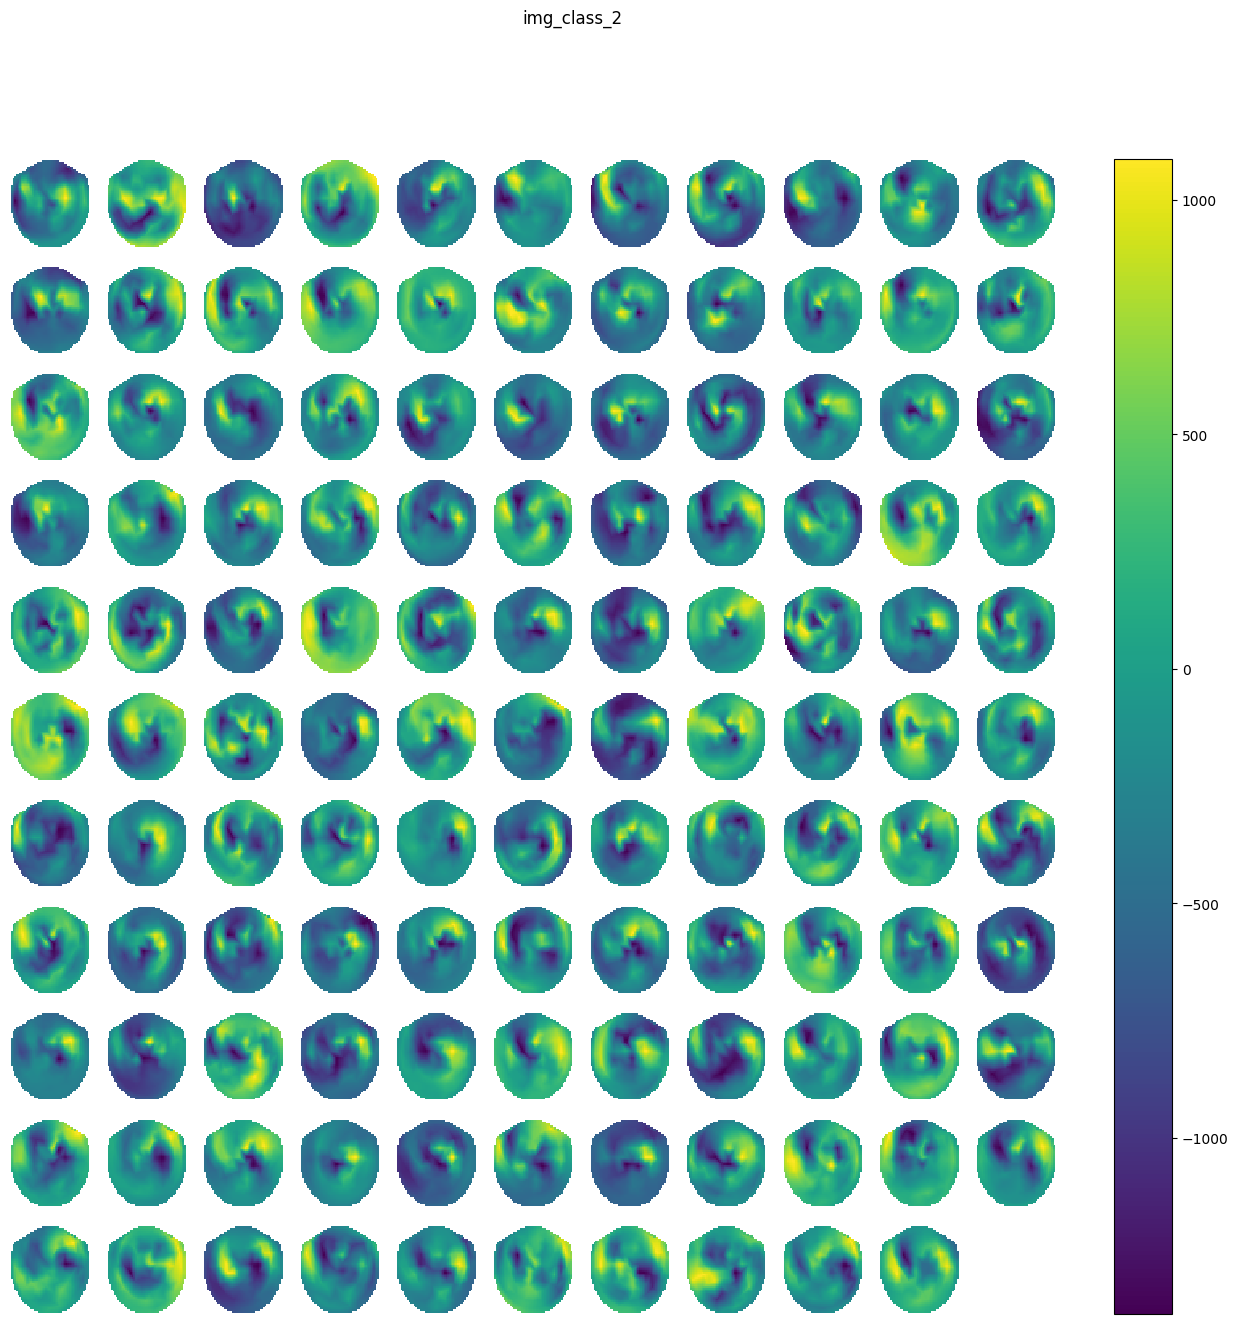

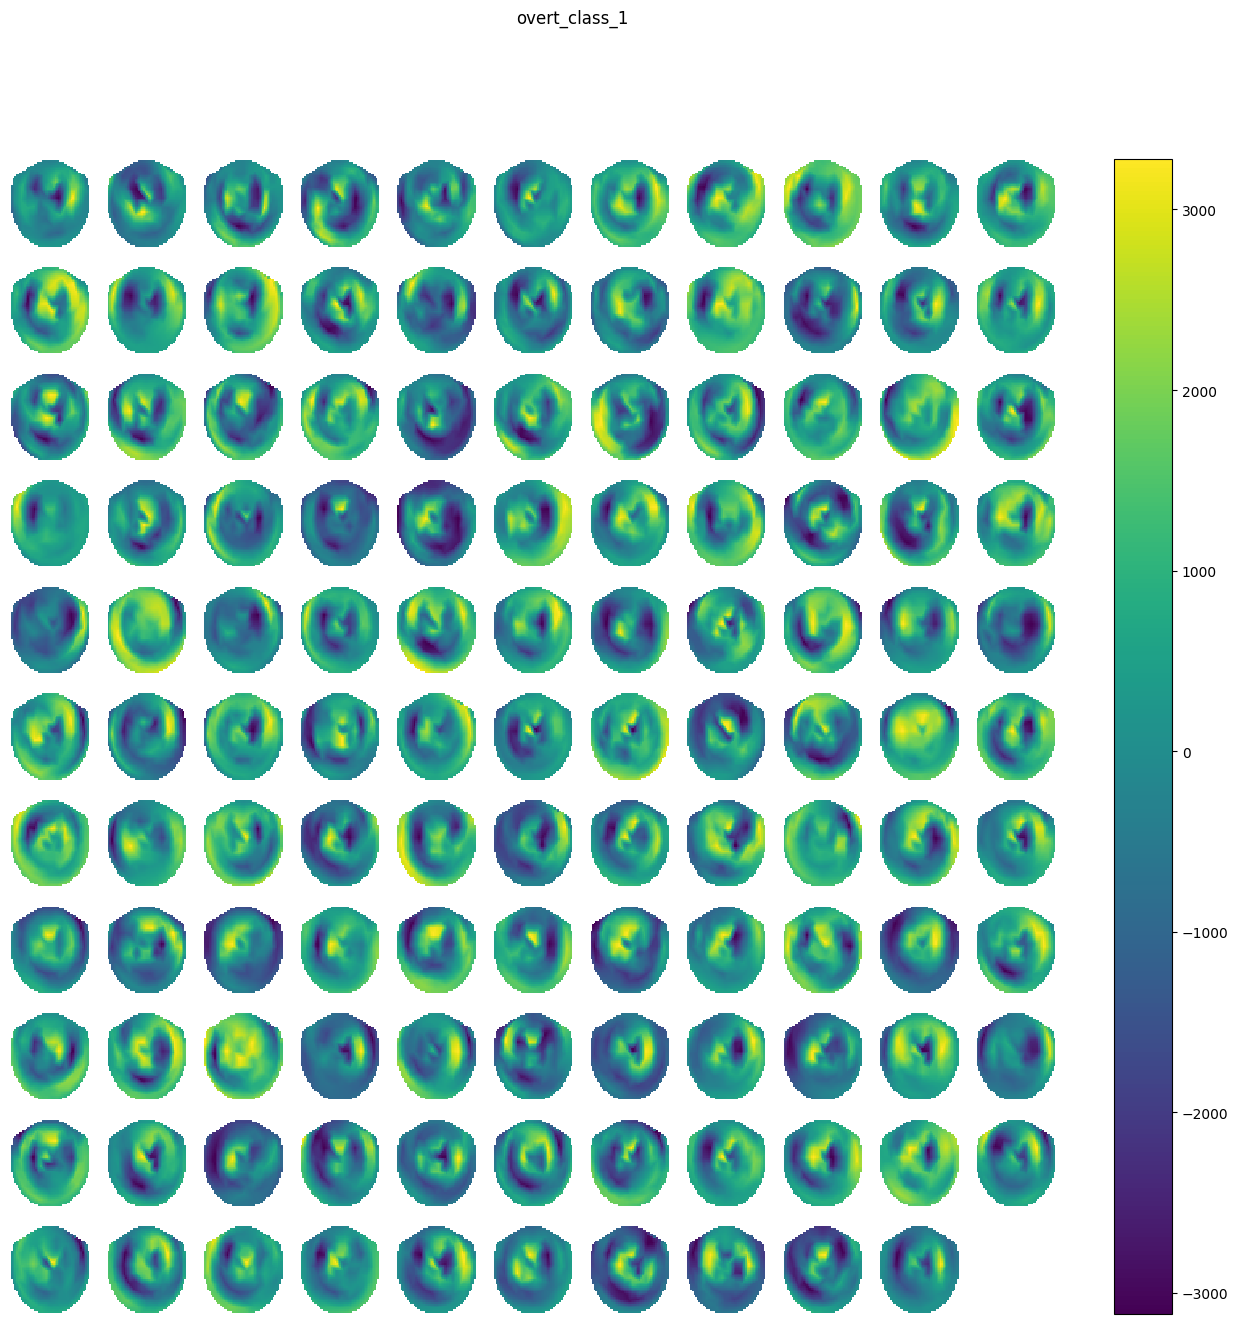

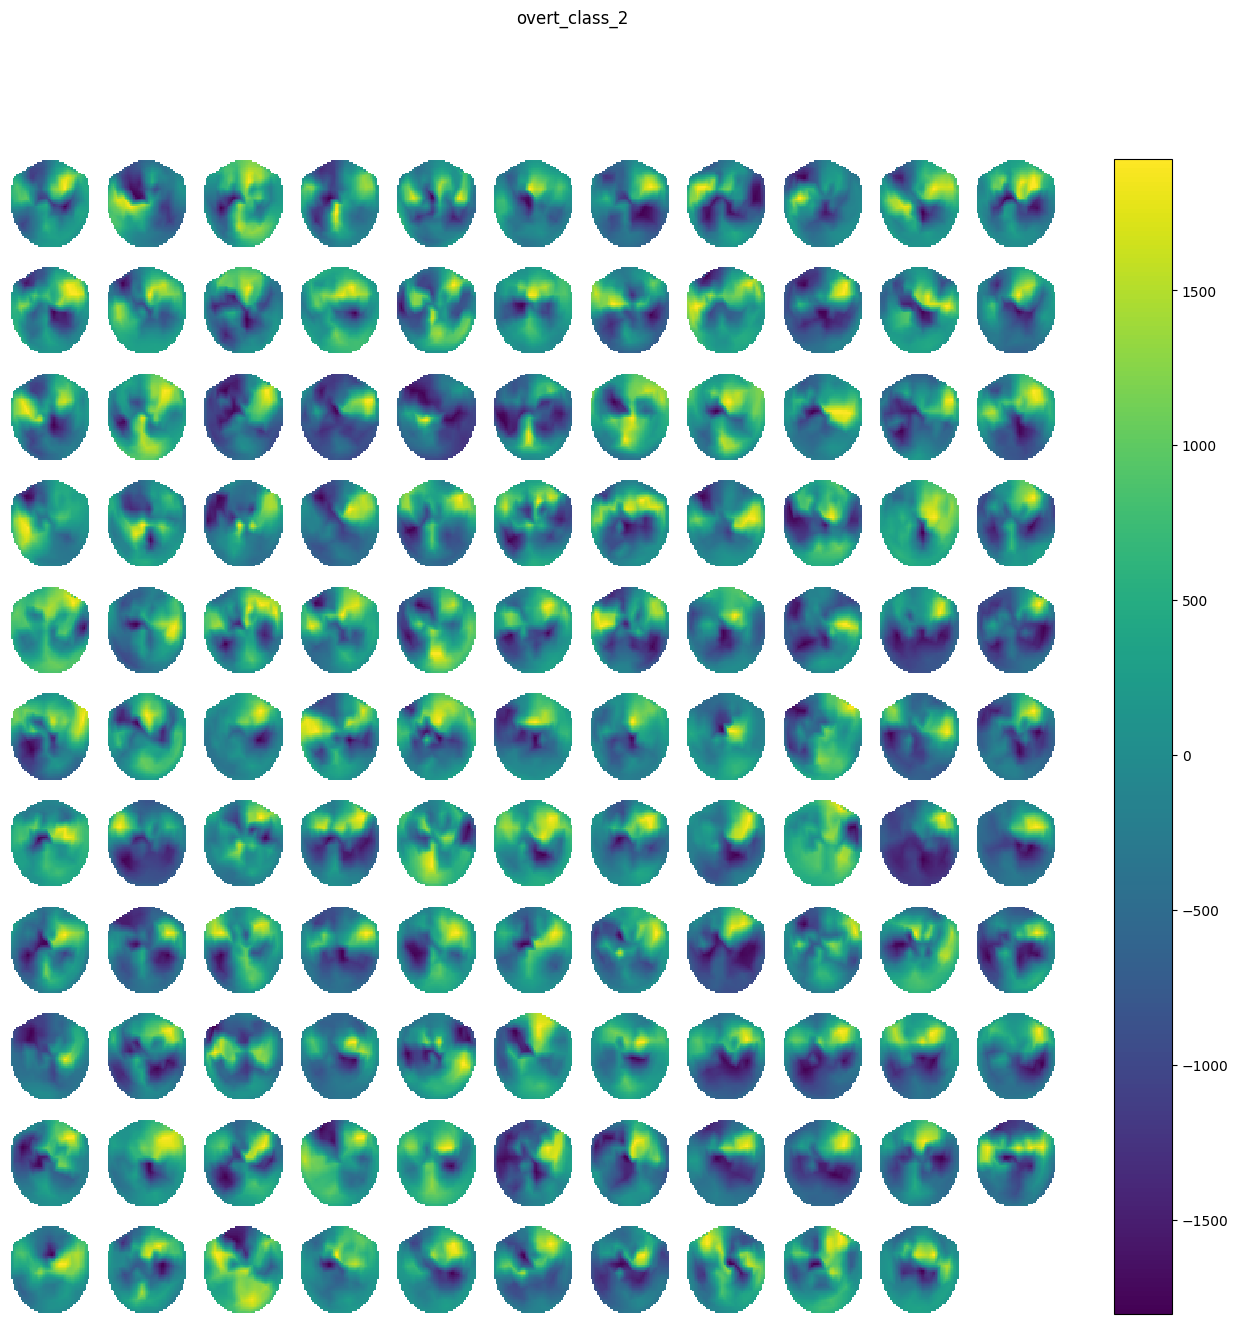

In [6]:
def plotBrains(data_x, data_y, title):
    xi = np.linspace(min(BCIsensor_xy[:,0]),max(BCIsensor_xy[:,0]))
    yi = np.linspace(min(BCIsensor_xy[:,1]),max(BCIsensor_xy[:,1]))
    gridx,gridy = np.meshgrid(xi,yi)
    fig, ax = plt.subplots(11,11,figsize=(15,15))
    for i in range(120):
        ii = i // 11
        jj = i % 11
        d = (data_x+data_y)[i]
        grid = griddata((BCIsensor_xy[:,0], BCIsensor_xy[:,1]), d, (gridx,gridy), method='linear')
        c = ax[ii][jj].pcolor(grid)
        ax[ii][jj].axis('off')
    ax[10][10].axis('off')
    cbar = fig.colorbar(c, ax=ax, orientation='vertical', fraction=0.05, pad=0.05)
    cbar.ax.yaxis.set_ticks_position('right')
    fig.suptitle(title)
    plt.show()
# transpose so they are (120, 102) each row is an observation
img_class_1_x = feaSubEImg_1[np.arange(0,feaSubEImg_1.shape[0],2)].T
img_class_1_y = feaSubEImg_1[np.arange(1,feaSubEImg_1.shape[0],2)].T
img_class_2_x = feaSubEImg_2[np.arange(0,feaSubEImg_2.shape[0],2)].T
img_class_2_y = feaSubEImg_2[np.arange(1,feaSubEImg_2.shape[0],2)].T

overt_class_1_x = feaSubEOvert_1[np.arange(0,feaSubEOvert_1.shape[0],2)].T
overt_class_1_y = feaSubEOvert_1[np.arange(1,feaSubEOvert_1.shape[0],2)].T
overt_class_2_x = feaSubEOvert_2[np.arange(0,feaSubEOvert_2.shape[0],2)].T
overt_class_2_y = feaSubEOvert_2[np.arange(1,feaSubEOvert_2.shape[0],2)].T

plotBrains(img_class_1_x,img_class_1_y,"img_class_1")
plotBrains(img_class_2_x,img_class_2_y,"img_class_2")
plotBrains(overt_class_1_x,overt_class_1_x,"overt_class_1")
plotBrains(overt_class_1_y,overt_class_1_y,"overt_class_2")

In [8]:
img_combined = np.ndarray((feaSubEImg_1.shape[1]+feaSubEImg_2.shape[1],feaSubEImg_1.shape[0]+1))
img_combined[:feaSubEImg_1.shape[1],:feaSubEImg_1.shape[0]] = feaSubEImg_1.T
img_combined[:feaSubEImg_1.shape[1],feaSubEImg_1.shape[0]] = 1
img_combined[feaSubEImg_1.shape[1]:,:feaSubEImg_2.shape[0]] = feaSubEImg_2.T
img_combined[feaSubEImg_1.shape[1]:,feaSubEImg_2.shape[0]] = 2

overt_combined = np.ndarray((feaSubEOvert_1.shape[1]+feaSubEOvert_2.shape[1],feaSubEOvert_1.shape[0]+1))
overt_combined[:feaSubEOvert_1.shape[1],:feaSubEOvert_1.shape[0]] = feaSubEOvert_1.T
overt_combined[:feaSubEOvert_1.shape[1],feaSubEOvert_1.shape[0]] = 1
overt_combined[feaSubEOvert_2.shape[1]:,:feaSubEOvert_1.shape[0]] = feaSubEOvert_2.T
overt_combined[feaSubEOvert_2.shape[1]:,feaSubEOvert_2.shape[0]] = 2
print(img_combined.shape)


(240, 205)


In [9]:
svm = SVC(kernel='linear', probability=True)
svm.fit(img_combined[:,:-1],img_combined[:,-1])
# imgpred = svm.predict(img_combined[:,:-1])
# overtpred = svm.predict(overt_combined[:,:-1])

In [14]:
def plotSVMBoundary(data, title):
    xi = np.linspace(min(BCIsensor_xy[:,0]),max(BCIsensor_xy[:,0]))
    yi = np.linspace(min(BCIsensor_xy[:,1]),max(BCIsensor_xy[:,1]))
    gridx,gridy = np.meshgrid(xi,yi)
    

    grid = griddata((BCIsensor_xy[:,0], BCIsensor_xy[:,1]), data, (gridx,gridy), method='linear')
    c = plt.pcolor(grid)
    plt.axis('off')
    plt.colorbar(c)
    plt.title(title)
    plt.show()
# plotSVMBoundary(imgpred, 'imgpred')

array([[ 7.77083533e-04,  2.05686577e-04,  1.37635377e-04,
        -4.66485634e-04, -1.09995823e-04, -1.50231209e-04,
         4.84414003e-04,  7.41301215e-05,  5.82427535e-04,
        -1.89463777e-05,  2.32727009e-04, -1.00840107e-03,
        -4.16093676e-04,  1.20164428e-03,  5.82846018e-05,
        -6.54638929e-04,  3.26764355e-04,  7.77353858e-05,
        -1.90358877e-04,  1.86256914e-04,  5.94739193e-05,
         1.01020577e-03, -6.40845658e-05,  1.02589714e-04,
        -4.79866612e-04, -1.10361560e-03,  5.49220024e-04,
        -1.00772046e-03,  7.13290275e-05,  7.41090415e-04,
         3.29098906e-04,  1.21919626e-03,  8.21810176e-04,
         1.32542055e-04,  1.19283360e-03, -6.15646710e-06,
         6.07673503e-04,  3.08437223e-04,  2.20795764e-04,
         6.53665437e-04, -3.51664128e-04,  6.05660414e-04,
        -7.48460886e-04, -1.02074228e-03, -3.55526296e-05,
        -5.48999575e-04, -6.96343236e-04,  7.48061248e-04,
        -8.66625854e-04,  6.28407294e-04, -5.98780270e-0